## Data Exploration

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns
from sklearn.impute import SimpleImputer
import os

## Data Loading

In [2]:
# Get the notebook's directory
notebook_dir = os.path.dirname(os.path.abspath('__file__'))
project_root = os.path.dirname(notebook_dir)

# Build data path
data_path = os.path.join(project_root, 'data', 'customer_churn.csv')

# Load data
df = pd.read_csv(data_path)
df.head()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0


In [3]:
# renaming columns to proper format
df.columns =  df.columns.str.strip().str.lower().str.replace(r'\s+', '_', regex=True)
    
df.columns.tolist()

['call_failure',
 'complains',
 'subscription_length',
 'charge_amount',
 'seconds_of_use',
 'frequency_of_use',
 'frequency_of_sms',
 'distinct_called_numbers',
 'age_group',
 'tariff_plan',
 'status',
 'age',
 'customer_value',
 'churn']

## Data Exploration

In [4]:
df.describe()

,call_failure,complains,subscription_length,charge_amount,seconds_of_use,frequency_of_use,frequency_of_sms,distinct_called_numbers,age_group,tariff_plan,status,age,customer_value,churn
count,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000
mean,7.627937,0.076508,32.541905,0.942857,4472.459683,69.460635,73.174921,23.509841,2.826032,1.077778,1.248254,30.998413,470.972916,0.157143
std,7.263886,0.265851,8.573482,1.521072,4197.908687,57.413308,112.237560,17.217337,0.892555,0.267864,0.432069,8.831095,517.015433,0.363993
min,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,15.000000,0.000000,0.000000
25%,1.000000,0.000000,30.000000,0.000000,1391.250000,27.000000,6.000000,10.000000,2.000000,1.000000,1.000000,25.000000,113.801250,0.000000
50%,6.000000,0.000000,35.000000,0.000000,2990.000000,54.000000,21.000000,21.000000,3.000000,1.000000,1.000000,30.000000,228.480000,0.000000
75%,12.000000,0.000000,38.000000,1.000000,6478.250000,95.000000,87.000000,34.000000,3.000000,1.000000,1.000000,30.000000,788.388750,0.000000
max,36.000000,1.000000,47.000000,10.000000,17090.000000,255.000000,522.000000,97.000000,5.000000,2.000000,2.000000,55.000000,2165.280000,1.000000


In [5]:
print(f'\nShape: {df.shape}')
print(f'\nDatatypes:\n{df.dtypes}')
print(f'\nMissing values count:\n{df.isnull().sum()}')


Shape: (3150, 14)

Datatypes:
call_failure                 int64
complains                    int64
subscription_length          int64
charge_amount                int64
seconds_of_use               int64
frequency_of_use             int64
frequency_of_sms             int64
distinct_called_numbers      int64
age_group                    int64
tariff_plan                  int64
status                       int64
age                          int64
customer_value             float64
churn                        int64
dtype: object

Missing values count:
call_failure               0
complains                  0
subscription_length        0
charge_amount              0
seconds_of_use             0
frequency_of_use           0
frequency_of_sms           0
distinct_called_numbers    0
age_group                  0
tariff_plan                0
status                     0
age                        0
customer_value             0
churn                      0
dtype: int64


In [6]:
print(f'Value Counts\n{df.complains.value_counts()}')
print(df.age_group.value_counts())
print(df.tariff_plan.value_counts())
print(df.status.value_counts())
print(df.churn.value_counts())

Value Counts
complains
0    2909
1     241
Name: count, dtype: int64
age_group
3    1425
2    1037
4     395
5     170
1     123
Name: count, dtype: int64
tariff_plan
1    2905
2     245
Name: count, dtype: int64
status
1    2368
2     782
Name: count, dtype: int64
churn
0    2655
1     495
Name: count, dtype: int64


**Ordinal Features**
- charge_amount
- age_group

Visualizations

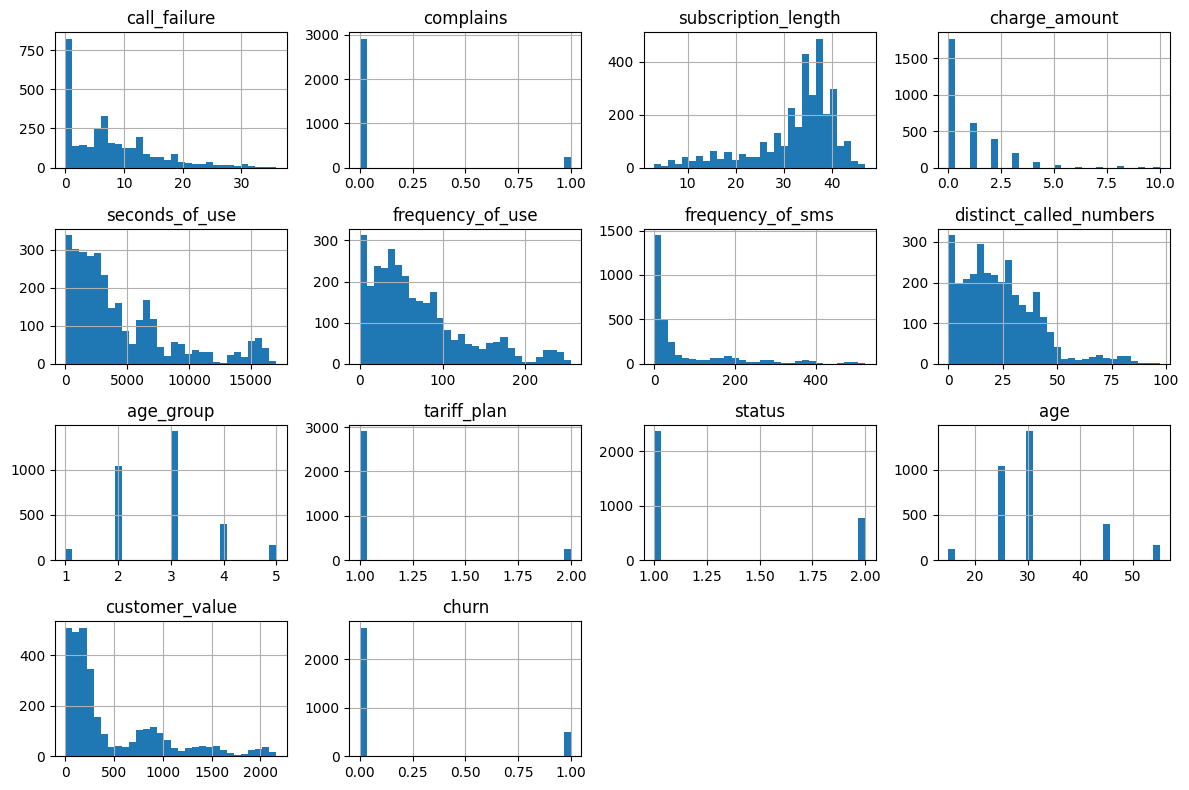

In [7]:
# Histograms of numeric features
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
df[num_cols].hist(bins=30, figsize=(12,8))
plt.tight_layout()
plt.show()

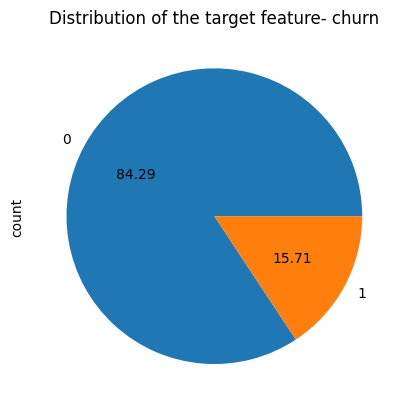

In [8]:
y = df['churn']
y.value_counts().plot.pie(autopct= '%.2f')
plt.title('Distribution of the target feature- churn')
plt.show()

Most of the numeric features are skewed. These will be handled in during preprocessing before model training.

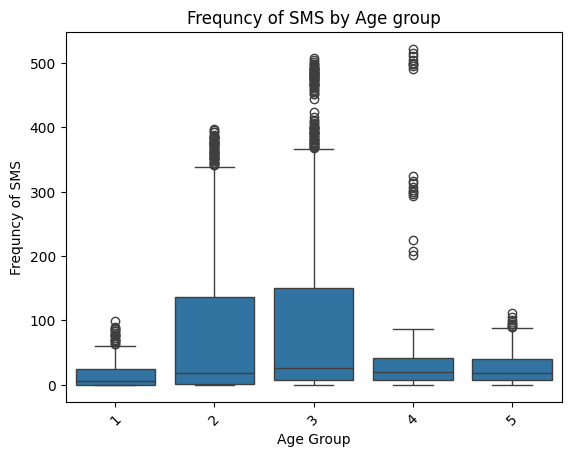

In [9]:
sns.boxplot(x='age_group', y='frequency_of_sms', data=df)
plt.xticks(rotation=45)
plt.title(f'Frequncy of SMS by Age group')
plt.xlabel('Age Group')
plt.ylabel('Frequncy of SMS')
plt.show()

Age group 2 and 3 have high frequency of SMS.

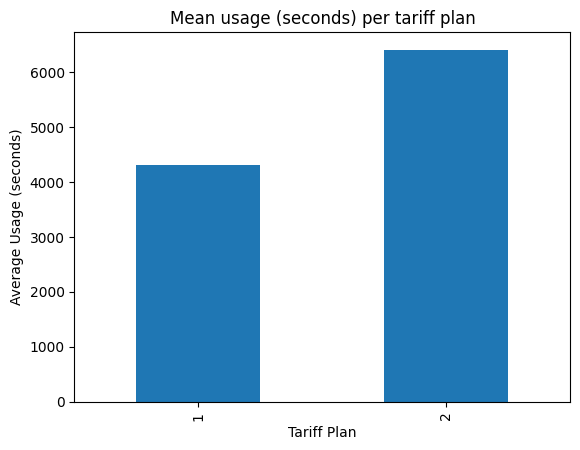

In [10]:
df.groupby('tariff_plan')['seconds_of_use'].mean().sort_values().plot(kind='bar')
plt.ylabel(f'Average seconds of use')
plt.title(f'Mean usage (seconds) per tariff plan')
plt.xlabel('Tariff Plan')
plt.ylabel('Average Usage (seconds)')
plt.show()

Customers with tariff plan 2 have more usage.

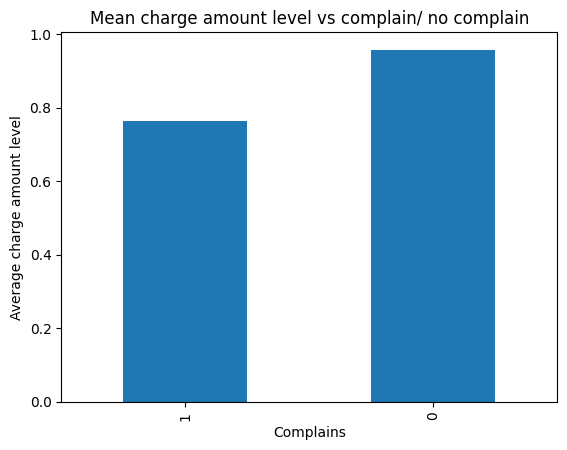

In [11]:
df.groupby('complains')['charge_amount'].mean().sort_values().plot(kind='bar')
plt.ylabel(f'Average charge amount level')
plt.title(f'Mean charge amount level vs complain/ no complain')
plt.xlabel('Complains')
plt.ylabel('Average charge amount level')
plt.show()

Customers paying more have less complains.

In [12]:
# correlations with target value churn
cor = df.corr()
cor['churn'].sort_values(ascending=False)

churn                      1.000000
complains                  0.532053
status                     0.498976
call_failure              -0.008987
age_group                 -0.014550
age                       -0.017705
subscription_length       -0.032588
tariff_plan               -0.105853
charge_amount             -0.202305
frequency_of_sms          -0.220754
distinct_called_numbers   -0.278867
customer_value            -0.289144
seconds_of_use            -0.298935
frequency_of_use          -0.303337
Name: churn, dtype: float64

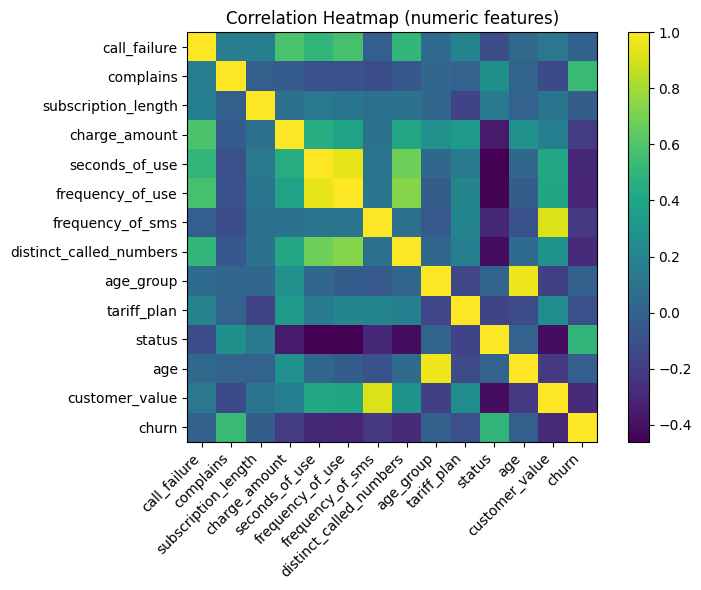

In [13]:
# Correlation heatmap (matplotlib only, no seaborn)
fig, ax = plt.subplots(figsize=(8,6))
cax = ax.imshow(cor.values, interpolation='nearest')
ax.set_xticks(range(len(cor.columns)))
ax.set_yticks(range(len(cor.index)))
ax.set_xticklabels(cor.columns, rotation=45, ha='right')
ax.set_yticklabels(cor.index)
fig.colorbar(cax)
ax.set_title("Correlation Heatmap (numeric features)")
plt.tight_layout()
plt.show()

- Complaints and status show the strongest positive association with churn.
- In contrast, engagement and value-related features—such as frequency_of_use, seconds_of_use, customer_value, distinct_called_numbers, and frequency_of_sms—have moderate negative correlations with churn, suggesting that highly engaged and higher-value customers are less likely to churn.
- Features like age, age_group, subscription_length, and call_failure show negligible correlations

In [14]:
# dropping features with very low correlation/ irrelevant
# corr <= 0.05

df.drop(columns= ['call_failure','age', 'subscription_length'], inplace= True)
print(f'Shape: {df.shape}')
df.head()


Shape: (3150, 11)


,complains,charge_amount,seconds_of_use,frequency_of_use,frequency_of_sms,distinct_called_numbers,age_group,tariff_plan,status,customer_value,churn
0,0,0,4370,71,5,17,3,1,1,197.640,0
1,0,0,318,5,7,4,2,1,2,46.035,0
2,0,0,2453,60,359,24,3,1,1,1536.520,0
3,0,0,4198,66,1,35,1,1,1,240.020,0
4,0,0,2393,58,2,33,1,1,1,145.805,0


## KPIs

Goal- to reduce churn and improve customer satisfaction.

Model performance KPIs
- Accuracy
- Precision
- Recall
- F1
- AUC-ROC

Business Based KPIs
- Churn rate
- Average usage per tariff plan 
- Customer value 
- Complaint rate = sum(complains) / total_customers

## Data Preprocessing

### Handling Missing Values

In [15]:
# no missing values but if there were missing values:
# this can also be handled in the pipeline

''' median imputation'''

# copy of original df
df_med = df.copy()

# median imputation for numerical columns (skewed)
median_imputer = SimpleImputer(strategy='median')

num_cols = df.select_dtypes(include= 'number').columns.tolist()

df_med[num_cols] = median_imputer.fit_transform(df[num_cols])

df_med.isna().sum()

complains                  0
charge_amount              0
seconds_of_use             0
frequency_of_use           0
frequency_of_sms           0
distinct_called_numbers    0
age_group                  0
tariff_plan                0
status                     0
customer_value             0
churn                      0
dtype: int64

In [16]:
df_med.skew()

complains                  3.187956
charge_amount              2.584868
seconds_of_use             1.321943
frequency_of_use           1.144166
frequency_of_sms           1.974142
distinct_called_numbers    1.029402
age_group                  0.473642
tariff_plan                3.154514
status                     1.166046
customer_value             1.427292
churn                      1.885063
dtype: float64

In [17]:
data_path = os.path.join(project_root, 'data', 'cleaned_data.csv')

df_med.to_csv(data_path)